# EXERCÍCIO 1: PRÉ-PROCESSAMENTO DE DADOS

Pegamos diferentes dados numéricos já tabelados e, utilizando a biblioteca pandas principalmente, limpamo-os e deixamos em um formato padrão, de forma que poderemos utilizar para qualquer aplicação que desejamos.

In [1]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))

import numpy as np
data = data.replace('?', np.nan)
data.head(25)

# remove as linhas com NaN
data = data.dropna() 
data.head(25)

# Remove as linhas duplicadas
data = data.drop_duplicates()
data.head(25)

data = data.drop(data.columns[[3, 4]], axis=1)
data.head(25)

print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (14, 3)


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


### Limpando os dados de forma a não perder conteúdo

In [2]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

import numpy as np
data = data.replace('?', np.nan)
data.head(25)

# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float) 
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
averages = np.nanmean(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(X)

# Calcula a mediana de cada coluna ignorando os NaN
medians = np.nanmedian(X, axis=0)
print("Mediana de cada coluna:", medians)

Número de linhas e colunas: (25, 5)
[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        

### Fazendo o boxplot e analisando 'outliers'

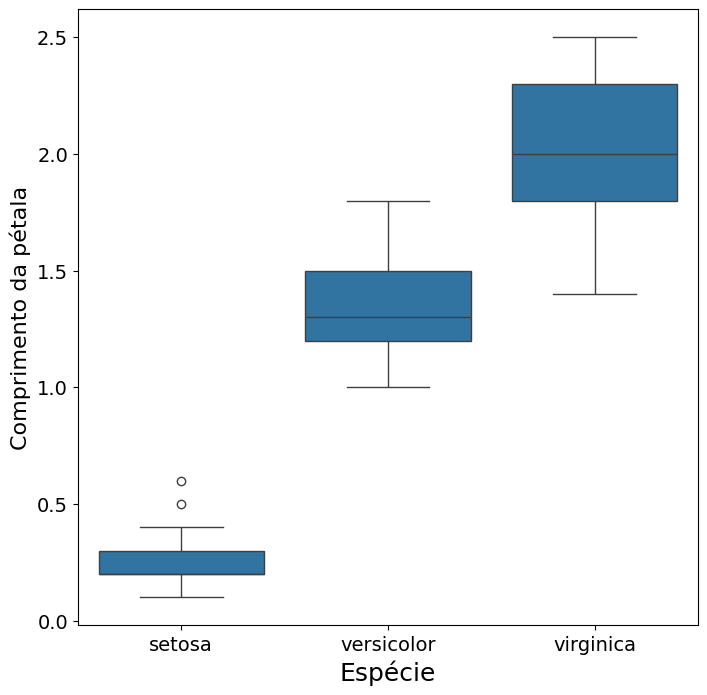

In [3]:
# biblioteca para mostrar os gráficos
import seaborn as sns
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados
data = pd.read_csv('data/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
# mostra o boxplot
sns.boxplot(x="species", y="petal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Analisando a correlação dos dados

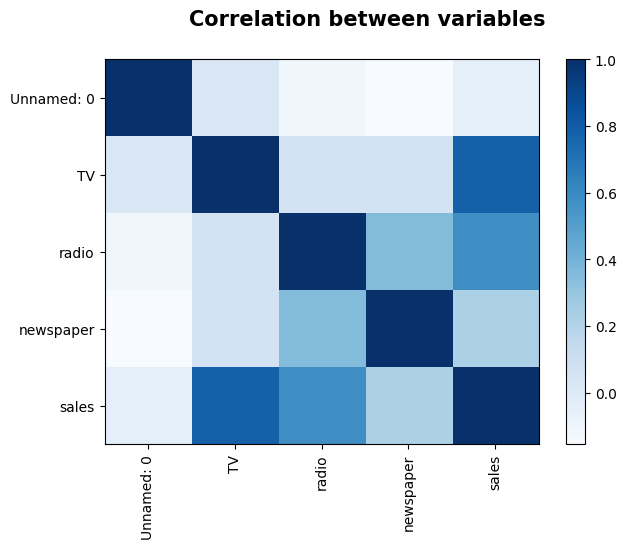

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/Advertising.csv', header=(0))

dataframe = pd.DataFrame(data)

corr = dataframe.corr()

#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()